Abalone Case Study

Library Import

In [99]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
%matplotlib inline

from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import  train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.linear_model import  Ridge
from sklearn.svm import SVR
import warnings

In [45]:
df=pd.read_csv('Ablone case study.csv')

In [46]:
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


According to the Infomation:
1)No-Null data
2)1 - Object Type
3)7 - Float Type
4)1 - Int Type

In [29]:
data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [30]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


According to Described Information:
1)No Feature has Minimum Value = 0, except Height
2)All Features are not Normally Distributed, ( Theortically if feature is normally distributed, Mean = Median = Mode ).
3)But Features are close to Normality
4)All numerical, Except Sex
5)Each Feature has Different Scale

array([[<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Whole weight'}>],
       [<AxesSubplot:title={'center':'Shucked weight'}>,
        <AxesSubplot:title={'center':'Viscera weight'}>,
        <AxesSubplot:title={'center':'Shell weight'}>,
        <AxesSubplot:title={'center':'Rings'}>]], dtype=object)

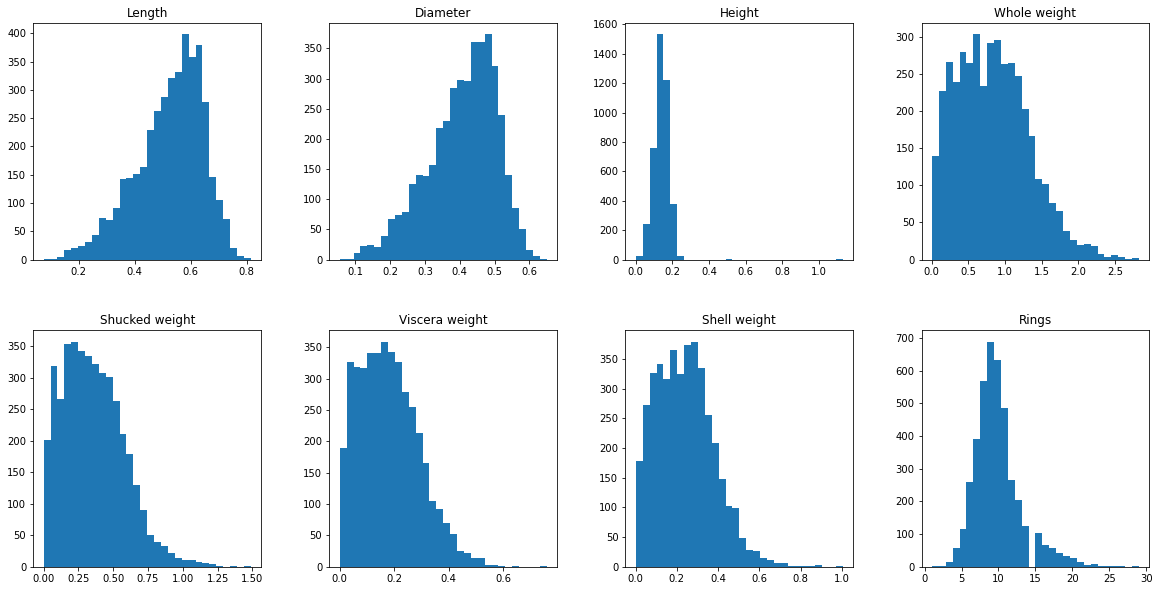

In [31]:
data.hist(figsize=(20,10), grid=False, layout=(2, 4), bins = 30)

'''After Seeing Above Graph of Data Distribution, I feel the Data is skewed, So checking for Skewness '''
skew_list = skew(df[nf],nan_policy='omit') #sending all numericalfeatures and omitting nan values
skew_list_df = pd.concat([pd.DataFrame(nf,columns=['Features']),pd.DataFrame(skew_list,columns=['Skewness'])],axis = 1)

In [34]:
numerical_features = data.select_dtypes(include=[np.number]).columns
categorical_features = data.select_dtypes(include=[np.object]).columns

In [35]:
numerical_features

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [36]:
categorical_features

Index(['Sex'], dtype='object')

In [37]:
skew_values = skew(data[numerical_features], nan_policy = 'omit')
dummy = pd.concat([pd.DataFrame(list(numerical_features), columns=['Features']), 
           pd.DataFrame(list(skew_values), columns=['Skewness degree'])], axis = 1)
dummy.sort_values(by = 'Skewness degree' , ascending = False)

,Features,Skewness degree
2,Height,3.127694
7,Rings,1.113702
4,Shucked weight,0.718840
6,Shell weight,0.620704
5,Viscera weight,0.591640
3,Whole weight,0.530768
1,Diameter,-0.608979
0,Length,-0.639643


For normally distributed data, the skewness should be about 0. For unimodal continuous distributions, a skewness value > 0 means that there is more weight in the right tail of the distribution. The function skewtest can be used to determine if the skewness value is close enough to 0, statistically speaking.

    - Height has highest skewedness followed by age, Shucked weight (can be cross verified through histogram plot)

In [47]:
'''Target Column Analysis'''
print("Value Count of Rings Column")
print(df.Rings.value_counts())
print("\nPercentage of Rings Column")
print(df.Rings.value_counts(normalize = True))

Value Count of Rings Column
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64

Percentage of Rings Column
9     0.164951
10    0.151784
8     0.135983
11    0.116591
7     0.093608
12    0.063921
6     0.062006
13    0.048599
14    0.030165
5     0.027532
15    0.024659
16    0.016040
17    0.013886
4     0.013646
18    0.010055
19    0.007661
20    0.006225
3     0.003591
21    0.003352
23    0.002155
22    0.001436
24    0.000479
27    0.000479
1     0.000239
25    0.000239
2     0.000239
26    0.000239
29    0.000239
Name: Rings, dtype: float64


No of Classes In Target

In [49]:
print(len(df.Rings.unique()))

28


Visualization

<AxesSubplot:xlabel='Sex', ylabel='count'>

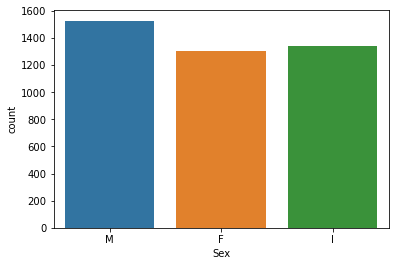

In [50]:
'''Sex Count of Abalone, M - Male, F - Female, I - Infant'''
sns.countplot(x='Sex', data = df)

In [51]:
'''Sex Ratio in Abalone'''
print("\nSex Count in Percentage")
print(df.Sex.value_counts(normalize = True))
print("\nSex Count in Numbers")
print(df.Sex.value_counts())


Sex Count in Percentage
M    0.365813
I    0.321283
F    0.312904
Name: Sex, dtype: float64

Sex Count in Numbers
M    1528
I    1342
F    1307
Name: Sex, dtype: int64


In [52]:
'''Small Feature Engineering, Deriving Age from Rings Column, Age = Rings + 1.5'''
df['Age'] = df['Rings'] + 1.5
df['Age'].head(5)

0    16.5
1     8.5
2    10.5
3    11.5
4     8.5
Name: Age, dtype: float64

C:\Users\asus\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\asus\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 52.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\asus\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 58.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Sex', ylabel='Age'>

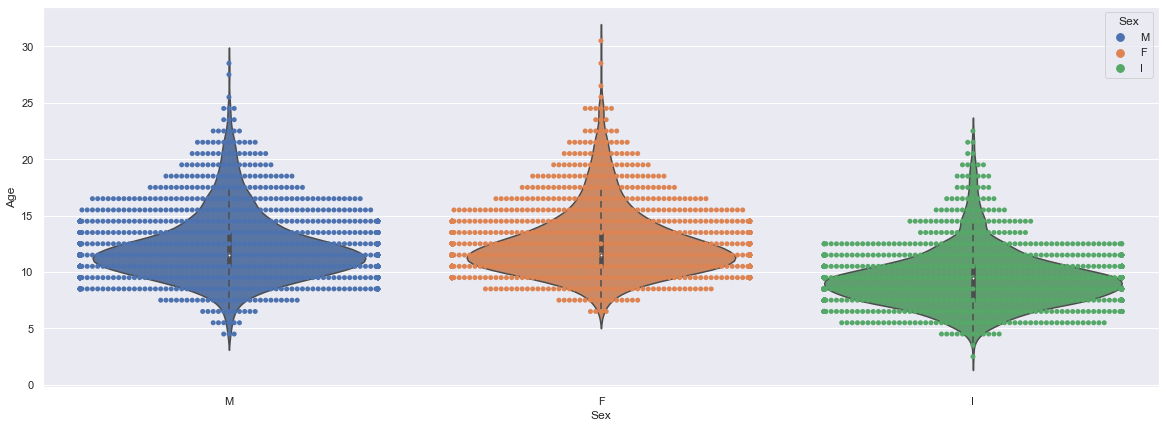

In [64]:
'''Sex and Age Visulization'''
plt.figure(figsize = (20,7))
sns.swarmplot(x = 'Sex', y = 'Age', data = df, hue = 'Sex')
sns.violinplot(x = 'Sex', y = 'Age', data = df)

 Male : age majority lies in between 7.5 years to 19 years
    Female: age majority lies in between 8 years to 19 years
    Immature: age majority lies in between 6 years to < 10 years

In [56]:
df.groupby('Sex')[['Length', 'Diameter', 'Height', 'Whole weight', 
                   'Shucked weight','Viscera weight', 'Shell weight', 'Age']].mean().sort_values(by = 'Age',ascending = False)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
Sex,,,,,,,,
F,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010,12.629304
M,0.561391,0.439287,0.151381,0.991459,0.432946,0.215545,0.281969,12.205497
I,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182,9.390462


Bivariate Analysis
Bivariate analysis is vital part of data analysis process for, it gives clear picture on how each features are affected in presence of other features.
It also helps us understand and identify significance features, overcome multi-collinearity effect, inter-dependency and thus, provides insights on hidden data noise pattern.

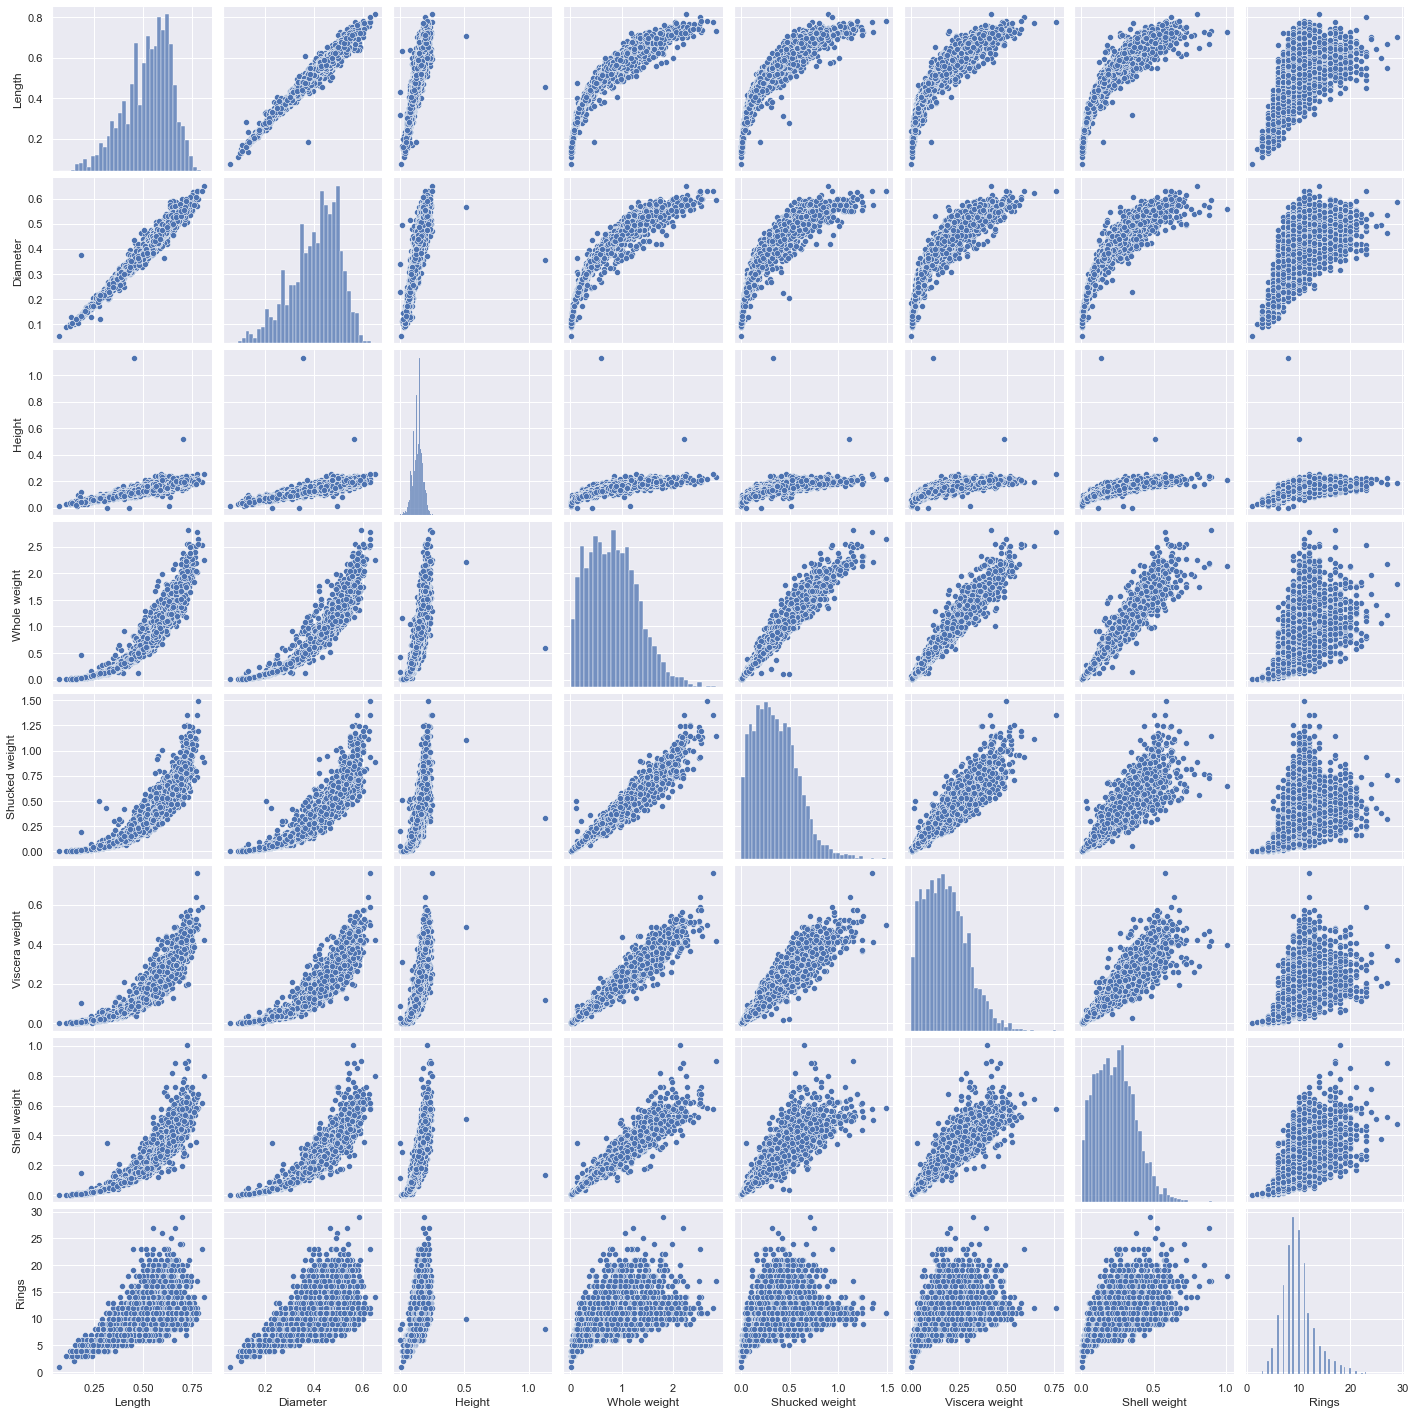

In [65]:
sns.pairplot(data[numerical_features])

key insights length is linearly correlated with diameter while, non-linear relation with height, whole weight, shucked weight, viscera weight and shell weight

<AxesSubplot:>

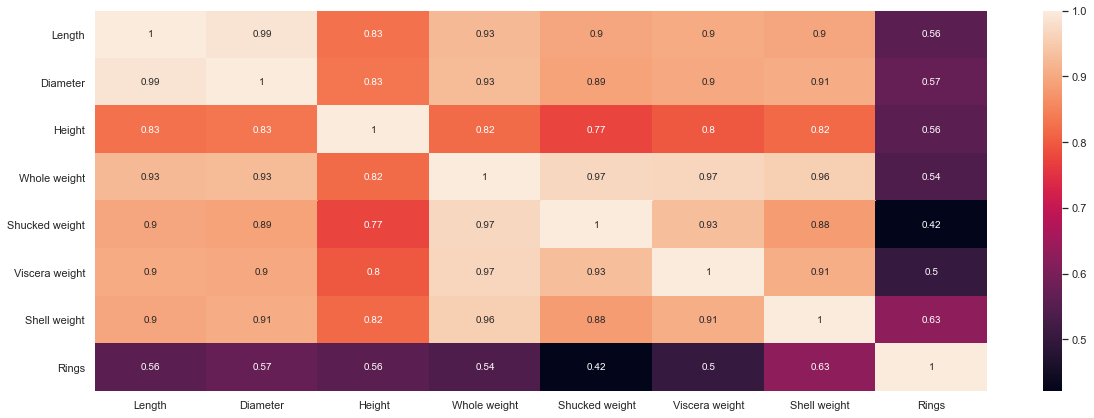

In [66]:
plt.figure(figsize=(20,7))
sns.heatmap(data[numerical_features].corr(), annot=True)

 Whole Weight is almost linearly varying with all other features except age
    Heigh has least linearity with remaining features
    Age is most linearly proprtional with Shell Weight followed by Diameter and length
    Age is least correlated with Shucked Weight


Outliers handlings

In [67]:
data = pd.get_dummies(data)
dummy_data = data.copy()

<AxesSubplot:>

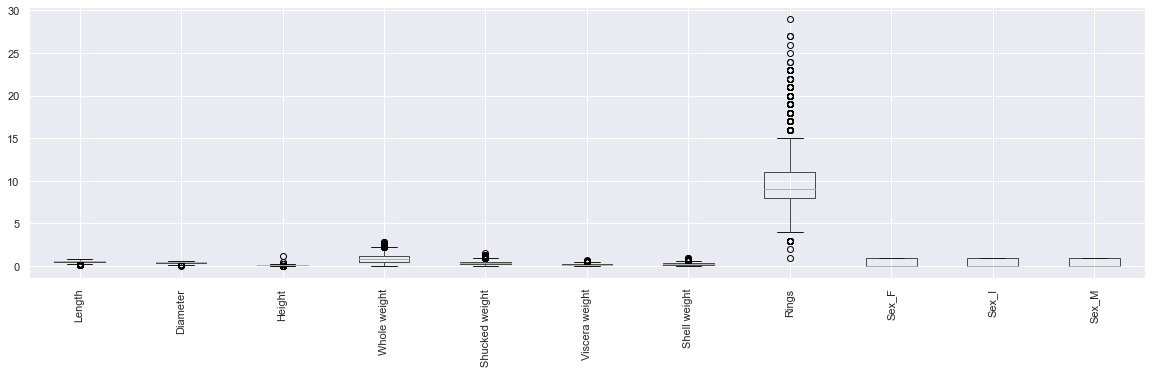

In [68]:
data.boxplot( rot = 90, figsize=(20,5))

Preprocessing Data for the Model

In [81]:
df['Sex'] = LabelEncoder().fit_transform(df['Sex'].tolist())

In [82]:
transformed_sex_feature = OneHotEncoder().fit_transform(df['Sex'].values.reshape(-1,1)).toarray()
df_sex_encoded = pd.DataFrame(transformed_sex_feature, columns = ["Sex_"+str(int(i)) for i in range(transformed_sex_feature.shape[1])])
df = pd.concat([df, df_sex_encoded], axis=1)

In [83]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age,Sex_0,Sex_1,Sex_2
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5,0.0,0.0,1.0
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5,0.0,0.0,1.0
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5,1.0,0.0,0.0
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5,0.0,0.0,1.0
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5,0.0,1.0,0.0


Data Splitting for Model
Learning Features
Predicting Feature
Train & Test Split

In [129]:
'''Learning Features and Predicting Features'''
Xtrain = df.drop(['Rings','Age','Sex'], axis = 1)
Ytrain = df['Rings']

In [130]:
'''Train Test Split , 70:30 Ratio'''
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size=0.33, random_state=42)

Simple Logistic Regression Model
No of Classes : 28

In [132]:
'''Creating Object of LogisticRegression'''
logreg = LogisticRegression()
'''Learning from Training Set'''
logreg.fit(X_train, Y_train)
'''Predicting for Training Set'''
Y_pred = logreg.predict(X_test)
'''Accuracy Score'''
result_acc = accuracy_score(Y_test,Y_pred)

C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [133]:
'''For Both, LabelEncoding and OneHotEncoding -> The accuracy is 25 %'''
result_acc

0.25815808556925307

Simple Logistic Regression Model
No of Classes : 2
1 - Rings > 10
0 - Rings <= 10

In [135]:
'''Creating New Target Variable '''
df['newRings'] = np.where(df['Rings'] > 10,1,0)

In [136]:
'''Learning Features and Predicting Features'''
Xtrain = df.drop(['newRings','Rings','Age','Sex'], axis = 1)
Ytrain = df['newRings']

In [137]:
'''Train Test Split , 70:30 Ratio'''
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size=0.33, random_state=42)

In [138]:
'''Creating Object of LogisticRegression'''
logreg = LogisticRegression()
'''Learning from Training Set'''
logreg.fit(X_train, Y_train)
'''Predicting for Training Set'''
Y_pred = logreg.predict(X_test)
'''Accuracy Score'''
result_acc = accuracy_score(Y_test,Y_pred) 

In [139]:
result_acc

0.7715736040609137

Note : If you have Binary Classification, Logistic Regression is able to Boost to Higher Accuracy
So to Handle Multi-Class Classification, We can Try SVM Model, as it works well for multi-class and multi-label Classification
Multi-Class Classification : When you have one target Column with 3 or more discreet values to predict, you state the problem as multi-class classification.
We WIll first try with all the 28 classes in the target column, using linear kernel , Regularization parameter value as 1, and gamma 1

In [140]:
'''Importing SVM from SK-Learn'''
from sklearn import svm

In [141]:
'''Learning Features and Predicting Features'''
Xtrain = df.drop(['Rings','Age','Sex'], axis = 1)
Ytrain = df['Rings']

In [142]:
'''Train Test Split , 70:30 Ratio'''
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size=0.33, random_state=42)

In [143]:
'''Creating Object of SVM'''
svmModel = svm.SVC(kernel='linear', C=1, gamma=1) 
'''Learning from Training Set'''
svmModel.fit(X_train, Y_train)
'''Predicting for Training Set'''
Y_pred = svmModel.predict(X_test)
'''Accuracy Score'''
result_acc = accuracy_score(Y_test,Y_pred) 

In [144]:
result_acc

0.37128353879622916

We can see, the Model Accuracy has increased with SVM, it is now 37 percent.
Lets Try to tweak the model Learning Process and see if the accuracy is increases or not.

In [145]:
'''Creating Object of SVM'''
svmModel = svm.SVC(kernel='rbf', C=1, gamma=100) 
'''Learning from Training Set'''
svmModel.fit(X_train, Y_train)
'''Predicting for Training Set'''
Y_pred = svmModel.predict(X_test)
'''Accuracy Score'''
result_acc = accuracy_score(Y_test,Y_pred) 

In [146]:
result_acc

0.38143582306018853

We can see, the Model Accuracy has increased with Tweaking SVM parameters, it is now 38 percent.
Lets Try to reduce the number of classes and see how the model is performing

In [147]:
'''Making a Copy of the primary DataSet'''
new_df = df.copy()

In [148]:
'''Feature Engineering , class 1 - 1-8, class 2 - 9-8, class 3 - 11 >'''
new_df['newRings_1'] = np.where(df['Rings'] <= 8,1,0)
new_df['newRings_2'] = np.where(((df['Rings'] > 8) & (df['Rings'] <= 10)), 2,0)
new_df['newRings_3'] = np.where(df['Rings'] > 10,3,0)

In [149]:
new_df['newRings'] = new_df['newRings_1'] + new_df['newRings_2'] + new_df['newRings_3']

In [150]:
'''Learning Features and Predicting Features'''
Xtrain = new_df.drop(['Rings','Age','Sex','newRings_1','newRings_2','newRings_3'], axis = 1)
Ytrain = new_df['newRings']

In [151]:
'''Train Test Split , 70:30 Ratio'''
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size=0.33, random_state=42)

In [152]:
'''Creating Object of SVM'''
svmModel = svm.SVC(kernel='rbf', C=1, gamma=100) 
'''Learning from Training Set'''
svmModel.fit(X_train, Y_train)
'''Predicting for Training Set'''
Y_pred = svmModel.predict(X_test)
'''Accuracy Score'''
result_acc = accuracy_score(Y_test,Y_pred) 

In [153]:
result_acc

0.9840464104423495

 we have not removed Outliers ( as we ad to capture all the type of different shapes and weights of abalone ), But with Less number of classes, SVM is giving an accuracy of 98% 
 

Preprocessing, Modeling, Evaluation


The base steps followed in any data modeling pipelines are:

           - pre-processing 
           - suitable model selection
           - modeling
           - hyperparamaters tunning using GridSearchCV
           - evaluation

In [105]:
X = data.drop('age', axis = 1)
y = data['age']

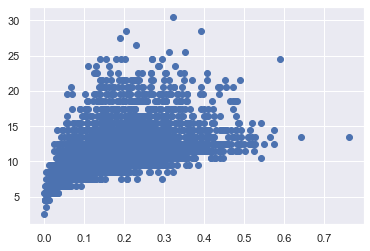

In [106]:
var = 'Viscera weight'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)

In [107]:
# outliers removal
data.drop(data[(data['Viscera weight']> 0.5) & (data['age'] < 20)].index, inplace=True)
data.drop(data[(data['Viscera weight']<0.5) & (data['age'] > 25)].index, inplace=True)


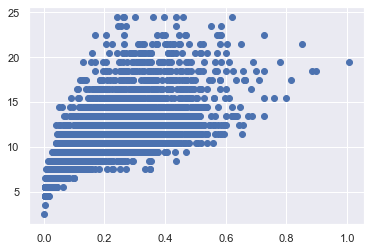

In [108]:
var = 'Shell weight'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)

In [109]:
data.drop(data[(data['Shell weight']> 0.6) & (data['age'] < 25)].index, inplace=True)
data.drop(data[(data['Shell weight']<0.8) & (data['age'] > 25)].index, inplace=True)

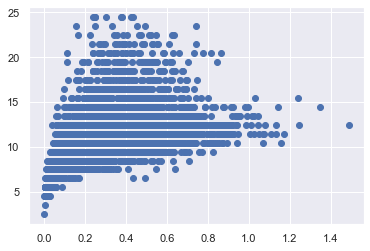

In [110]:
var = 'Shucked weight'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)

In [111]:
data.drop(data[(data['Shucked weight']>= 1) & (data['age'] < 20)].index, inplace=True)
data.drop(data[(data['Shucked weight']<1) & (data['age'] > 20)].index, inplace=True)

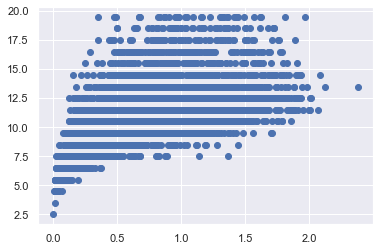

In [112]:
var = 'Whole weight'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)

In [113]:
data.drop(data[(data['Whole weight']>= 2.5) & (data['age'] < 25)].index, inplace=True)
data.drop(data[(data['Whole weight']<2.5) & (data['age'] > 25)].index, inplace=True)

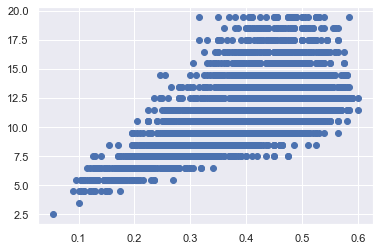

In [114]:
var = 'Diameter'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)

In [115]:
data.drop(data[(data['Diameter']<0.1) & (data['age'] < 5)].index, inplace=True)
data.drop(data[(data['Diameter']<0.6) & (data['age'] > 25)].index, inplace=True)
data.drop(data[(data['Diameter']>=0.6) & (data['age']< 25)].index, inplace=True)

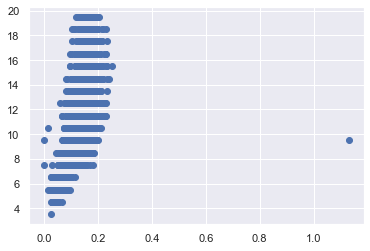

In [116]:
var = 'Height'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)

In [117]:
data.drop(data[(data['Height']>0.4) & (data['age'] < 15)].index, inplace=True)
data.drop(data[(data['Height']<0.4) & (data['age'] > 25)].index, inplace=True)

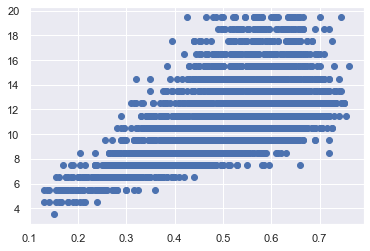

In [118]:
var = 'Length'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)

In [119]:
data.drop(data[(data['Length']<0.1) & (data['age'] < 5)].index, inplace=True)
data.drop(data[(data['Length']<0.8) & (data['age'] > 25)].index, inplace=True)
data.drop(data[(data['Length']>=0.8) & (data['age']< 25)].index, inplace=True)

Preprocessing, Modeling, Evaluation
The base steps followed in any data modeling pipelines are:

           - pre-processing 
           - suitable model selection
           - modeling
           - hyperparamaters tunning using GridSearchCV
           - evaluation

In [120]:
X = data.drop('age', axis = 1)
y = data['age']

In [121]:
standardScale = StandardScaler()
standardScale.fit_transform(X)

selectkBest = SelectKBest()
X_new = selectkBest.fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.25)

In [122]:
np.random.seed(10)
def rmse_cv(model, X_train, y):
    rmse =- (cross_val_score(model, X_train, y, scoring='neg_mean_squared_error', cv=5))
    return(rmse*100)

models = [LinearRegression(),
             Ridge(),
             SVR(),
             RandomForestRegressor(),
             GradientBoostingRegressor(),
             KNeighborsRegressor(n_neighbors = 4),]

names = ['LR','Ridge','svm','GNB','RF','GB','KNN']

for model,name in zip(models,names):
    score = rmse_cv(model,X_train,y_train)
    print("{}    : {:.6f}, {:4f}".format(name,score.mean(),score.std()))

LR    : 357.332913, 32.284022
Ridge    : 360.915808, 34.664269
svm    : 379.175822, 42.869541
GNB    : 341.891934, 26.281988
RF    : 340.373347, 34.821267
GB    : 385.203384, 36.300512


You have seen the perofrmance of each one of above models.

So, according to you which model should we start or choose? Well the answer lies in Occam's razor principle from philosophy." Suppose there exist two explanations for an occurrence. In this case the simpler one is usually better. Another way of saying it is that the more assumptions you have to make, the more unlikely an explanation." Hence, starting with the simplest model Ridge, for various reasons:

        - Feature Dimension is less
        - No misisng values
        - Few categorical features

In [124]:
def modelfit(alg, dtrain, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['age'])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    #dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = -cross_val_score(alg, dtrain[predictors], dtrain['age'], cv=cv_folds, 
                                                    scoring='r2')
    
    #Print model report:
    print ("\nModel Report")
    print( "RMSE : %.4g" % mean_squared_error(dtrain['age'].values, dtrain_predictions))
    print( "R2 Score (Train): %f" % r2_score(dtrain['age'], dtrain_predictions))
    
    if performCV:
        print( "CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),
                                                                                 np.min(cv_score),np.max(cv_score)))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.coef_, predictors).sort_values(ascending=False)
        plt.figure(figsize=(20,4))
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')


Model Report
RMSE : 3.593
R2 Score (Train): 0.529894
CV Score : Mean - -0.4503433 | Std - 0.08079434 | Min - -0.514565 | Max - -0.3061263


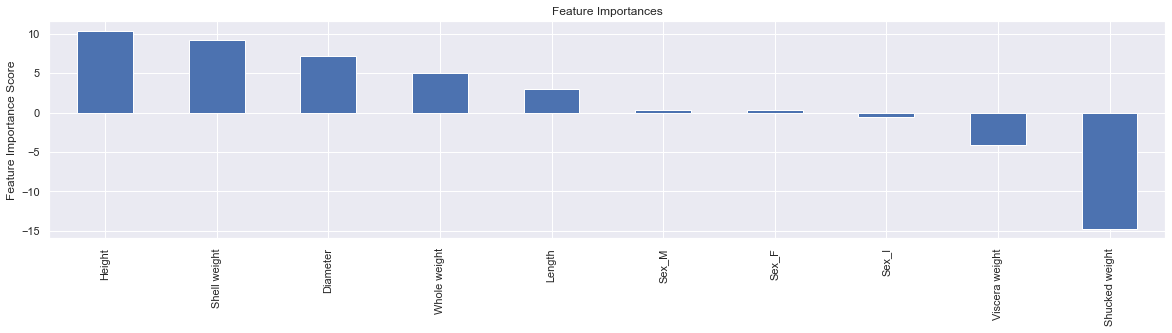

In [125]:
# Base Model
predictors = [x for x in data.columns if x not in ['age']]
lrm0 = Ridge(random_state=10)
modelfit(lrm0, data, predictors)

Hyperparameter tunning using GrideSearchCV

In [127]:
# Let's do hyperparameter tunning using GrideSearchCV
from sklearn.model_selection import  GridSearchCV
param  = {'alpha':[0.01, 0.1, 1,10,100],
         'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
glrm0 = GridSearchCV(estimator = Ridge(random_state=10,),
param_grid = param,scoring= 'r2' ,cv = 5,  n_jobs = -1)
glrm0.fit(X_train, y_train)
glrm0.best_params_, glrm0.best_score_

({'alpha': 0.1, 'solver': 'sag'}, 0.5332384099678127)


Model Report
RMSE : 3.558
R2 Score (Train): 0.534426
CV Score : Mean - -0.4543985 | Std - 0.08665801 | Min - -0.5172686 | Max - -0.2913273


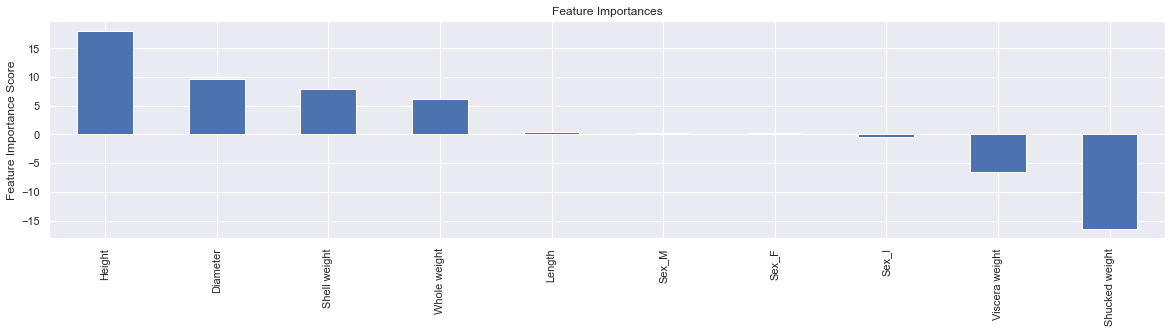

In [128]:
modelfit(Ridge(alpha = 0.1,random_state=10,), data, predictors)

CV score has improved slightly while, R2_score has decreased showing base model was overfitted. Using above process multiple options can be tried to could up with much more robust model. This process can also be tried on different models : RF, GB, etc.

Hyperparameter tunning is an iterative process and it can go on. As this kernal primary focuses on EDA of Abalone dataset, modeling building will be taken into another kernal ["Modeling - Abalone Age Prediction" ]. Hope I have helped you getting insights of Abalone dataset through this kernal.

Final Conclusion : we have not removed Outliers ( as we ad to capture all the type of different shapes and weights of abalone ), But with Less number of classes, SVM is giving an accuracy of 98% .